In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow.keras.datasets import mnist
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print(train_images.shape,train_labels.shape)
print(train_images.dtype,train_labels.dtype)

(60000, 28, 28) (60000,)
uint8 uint8


In [ ]:
#转换数据格式,flatten数据并转成float型
train_x=tf.reshape(tf.cast(train_images,tf.float32)/255.0,(-1,784))
#标签转为one-hot
train_label=tf.cast(tf.one_hot(train_labels,depth=10),tf.float32)

test_x=tf.reshape(tf.cast(test_images,tf.float32)/255.0,(-1,784))
#标签转为one-hot
test_label=tf.cast(tf.one_hot(test_labels,depth=10),tf.float32)

In [ ]:
train_x.shape,train_x.dtype,train_label.shape,train_label.dtype

(TensorShape([60000, 784]), tf.float32, TensorShape([60000, 10]), tf.float32)

In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat',
             'Sandal','Shirt','Sneaker','Bag','Ankle boot']

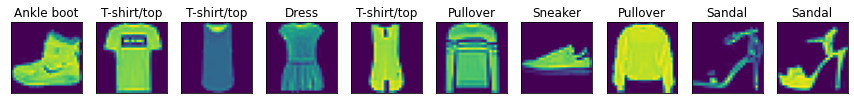

In [ ]:
plt.figure(figsize=(15,15))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.title(class_names[train_labels[i]])
  plt.imshow(train_images[i])
  plt.xticks([])
  plt.yticks([])

In [ ]:
#多层神经网络，增加隐藏层
def model(x,w0,b0,w1,b1):
  #这里x有784个features,如果首个隐藏层有128个神经元,则w0的shape为(784,128),b0为(128,)
  h1=tf.add(tf.matmul(x,w0),b0)
  #增加relu激活层，使值<=0的神经元不输出，把最终输出转为非线性
  h2=tf.nn.relu(h1)

  #输出层,输出为10个分类;所以连接上一层的输出,这一层 w1的shape为(128,10),b1为(10,)
  h3=tf.add(tf.matmul(h2,w1),b1) #另一种写法 h3=h2@w1+b1
  #应用softmax函数把压缩成各分类的概率值
  return tf.nn.softmax(h3)

In [ ]:
#y:观察值  y_hat:模型值
def loss_fun(y,y_hat):
  return tf.reduce_mean(-tf.reduce_sum(y*tf.math.log(tf.clip_by_value(y_hat,1e-8,1.)),axis=1))

In [ ]:
#label_pred:模型的输出值，label:输出观察值
def accuracy(label_pred,label):
  return tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label_pred,axis=1),tf.argmax(label,axis=1)),tf.float32))

In [ ]:
#用于多层神经网络训练
def train(w0,b0,w1,b1):
  epochs=1000 #回合数
  # l_r=0.1
  losses=[]
  
  for epoch in range(epochs):
    l_r=0.1-(0.1-0.01)/epochs*epoch  #学习率,随训练回合数从0.1减小为0.01

    #这里把训练的数据分成300一个的若干个批次，可以提升训练的效率；当然也可以不分成小批次，直接把train_x和train_label
    #直接用于训练
    mnist_batch=tf.data.Dataset.from_tensor_slices((train_x,train_label)).shuffle(train_x.shape[0]).batch(300)
    loss_sum=0

    for x_train,y_train in mnist_batch:
      with tf.GradientTape() as tape:
        tape.watch([w0,b0,w1,b1])
        y_hat=model(x_train,w0,b0,w1,b1)
        loss=loss_fun(y_train,y_hat)
        losses.append(loss)
      gradients=tape.gradient(loss,[w0,b0,w1,b1])
      w0.assign_sub(l_r*gradients[0])
      b0.assign_sub(l_r*gradients[1])
      w1.assign_sub(l_r*gradients[2])
      b1.assign_sub(l_r*gradients[3])
      loss_sum += loss.numpy()

    if epoch % 50 ==0:
      print("epoch={} loss={} train_accuracy={}".format(epoch+1,loss,accuracy(model(train_x,w0,b0,w1,b1),train_label)))
      print("   test_accuracy={}".format(accuracy(model(test_x,w0,b0,w1,b1),test_label)))
  return losses

In [ ]:
#初始化变量 w0：shape(784,128),b0:(128,)
#初始化变量 w1：shape(128,10),b1:(10,)

w0=tf.Variable(tf.random.truncated_normal((784,128),stddev=0.01))
b0=tf.Variable(tf.zeros((128,)),dtype=tf.float32)
w1=tf.Variable(tf.random.truncated_normal((128,10),stddev=0.01))
b1=tf.Variable(tf.zeros((10,)),dtype=tf.float32)

losses=train(w0,b0,w1,b1)

epoch=1 loss=0.8004627227783203 train_accuracy=0.7159666419029236
   test_accuracy=0.70660001039505
epoch=51 loss=0.23333372175693512 train_accuracy=0.901449978351593
   test_accuracy=0.8701000213623047
epoch=101 loss=0.228814497590065 train_accuracy=0.9362666606903076
   test_accuracy=0.8889999985694885
epoch=151 loss=0.15481294691562653 train_accuracy=0.9504833221435547
   test_accuracy=0.88919997215271
epoch=201 loss=0.12032922357320786 train_accuracy=0.9684333205223083
   test_accuracy=0.8946999907493591
epoch=251 loss=0.10011661797761917 train_accuracy=0.9769333600997925
   test_accuracy=0.8938999772071838
epoch=301 loss=0.04550911486148834 train_accuracy=0.9833999872207642
   test_accuracy=0.8921999931335449
epoch=351 loss=0.04071692004799843 train_accuracy=0.9865166544914246
   test_accuracy=0.8907999992370605
epoch=401 loss=0.05413014069199562 train_accuracy=0.9889000058174133
   test_accuracy=0.8895000219345093
epoch=451 loss=0.043962135910987854 train_accuracy=0.9921166896820

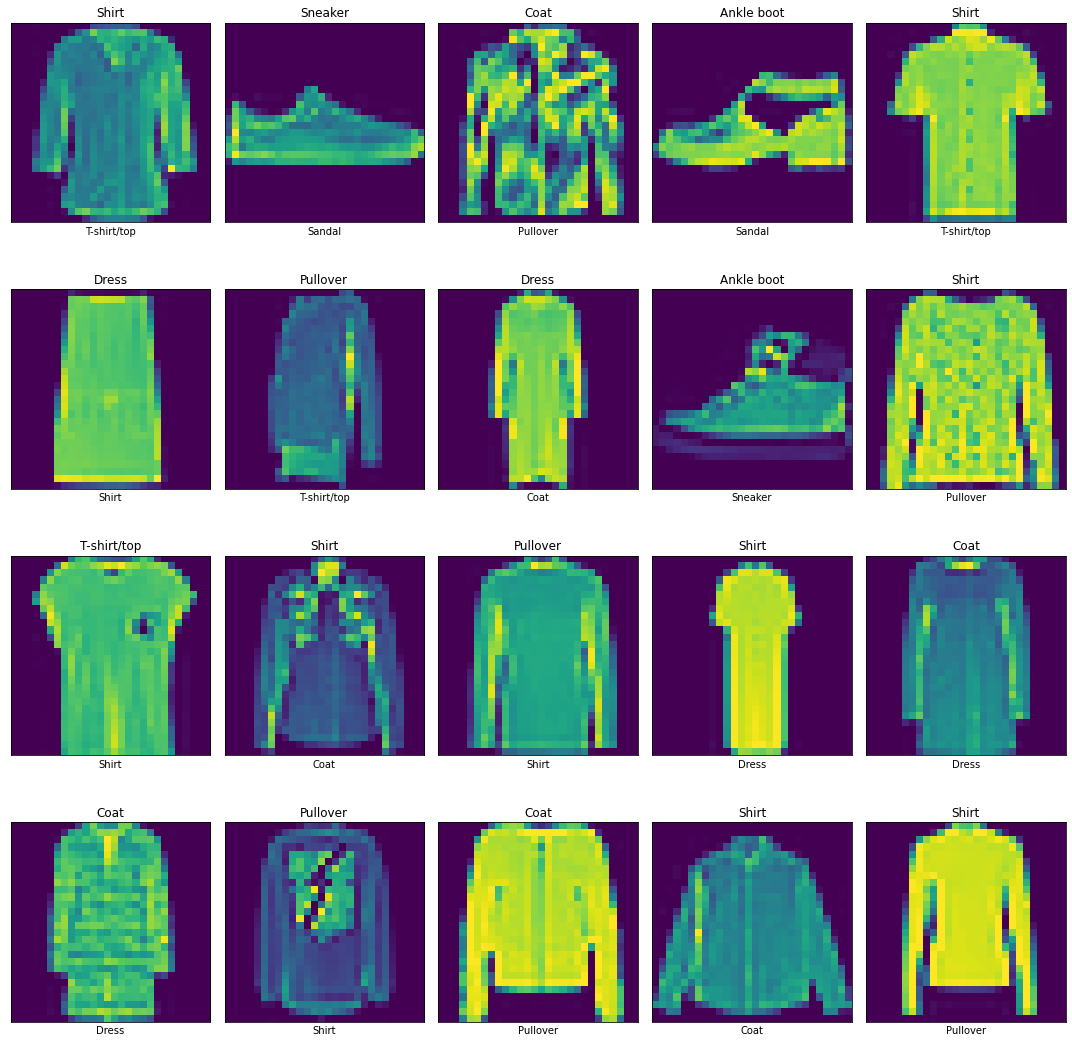

In [ ]:
#获取模型和观察值不等的索引
ind=tf.not_equal(tf.argmax(model(test_x,w0,b0,w1,b1),axis=1),tf.argmax(test_label,axis=1))

#用索引获取相应的 test_x,test_label及模型model的输出值
test_x_err=test_images[ind]
test_label_err=test_labels[ind]
model_err=model(test_x,w0,b0,w1,b1)[ind]

plt.figure(figsize=(15,15))
#显示前20张判断错误的图片
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.title(class_names[test_label_err[i]])
  plt.imshow(test_x_err[i])
  plt.xticks([])
  plt.yticks([])
  xlabel=str(class_names[tf.argmax(model_err[i]).numpy()])
  plt.xlabel(xlabel)

plt.tight_layout()

(-0.25, 1.0)

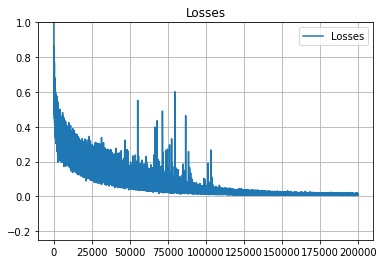

In [ ]:
plt.plot(range(len(losses)),losses,label="Losses")
plt.title('Losses')
plt.legend()
plt.grid(True)
plt.ylim([-.25,1])

In [ ]:
len(losses)

200000